# <font size = 8 color ='336EFF'>Classification Systems</font>

In [2]:
#  MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.

# Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning

# fetches the MNIST dataset from OpenML.org:

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

# The sklearn.datasets package contains mostly three types of functions:
# 1. fetch_* functions such as fetch_openml() to download real-life datasets,
# 2. load_* functions to load small toy datasets bundled with sciki-learn
# 3. make_* functions to generate fake datasets, useful for tests.

# Generated datasets are usually returned as (X, y) tuple containing the input
# data and the targets, both as NumPy arrays. 

# Other datasets are returned as 'sklearn.utils.Bunch' objects, which are dictionaries
# whose entries can also be accessed as attributes. 

# They generally contain the following entries:
# "DESCR"
# A description of the dataset

# "data"
# The input data, usually as a 2D NumPy array

# "target"
# The labels, usually as a 1D NumPy array

# The fetch_openml() function is a bit unusual since by default it returns the inputs as a Pandas DataFrame and the labels as a Pandas Series (unless the dataset is sparse).
# But the MNIST dataset contains images, and DataFrames aren’t ideal for that, so it’s preferable to set as_frame=False to get the data as NumPy arrays instead. Let’s look at these arrays:

/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# There are 70,000 images, and each image has 784 features. 
# This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

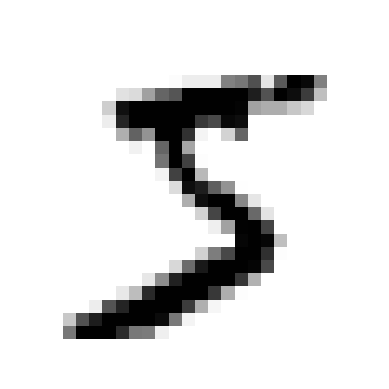

In [14]:
# Let’s take a peek at one digit(img) from the dataset. All we need to do is grab an instance’s
# feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow()
# function. We use cmap="binary" to get a grayscale color map where 0 is white and 255
# is black:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [19]:
y[0] # Label

'5'

In [20]:
# But wait! You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset returned by fetch_openml() is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# The training set is already shuffled for us, which is good because this guarantees that all cross-validation folds will be similar (we don’t want one fold to be missing some digits).

# Moreover, some learning algorithms are sensitive to the order of the training instances,
# and they perform poorly if they get many similar instances in a row. Shuffling the
# dataset ensures that this won’t happen.

# Training a Binary Classifier

In [23]:
# Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. 
# This “5-detector” will be an example of a binary classifier, capable of distinguishing
# between just two classes, 5 and non-5.
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [24]:
# Now let’s pick a classifier and train it. A good place to start is with a stochastic gradient
# descent (SGD, or stochastic GD) classifier, using Scikit-Learn’s SGDClassifier class.
from sklearn.linear_model import SGDClassifier

# This classifier is capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time, which also makes SGD well suited for online learning, as you will see later.
# Let’s create an SGDClassifier and train it on the whole training set:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [32]:
# Now we can use it to detect images of the number 5.
sgd_clf.predict([X[69999]])

array([False])

In [33]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

In [34]:
# Let's evaluate on the model performance.
# Evaluating a classifier is often significantly trickier than evaluating a regressor.

## Measuring Accuracy Using Cross-Validation

In [35]:
# A good way to evaluate a model is to use cross-validation. 
# Let’s use the cross_val_score() function to evaluate our SGDClassifier model, 
# using k-fold cross-validation with three folds.

# Remember that k-fold cross-validation means splitting the training set into k folds (in this case, three), then training the model k times, holding out a different fold each time for evaluation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [36]:
# Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?

# let’s look at a dummy classifier that just classifies every single image in the most frequent class,
# which in this case is the negative class.
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # prints False: no 5s detected

False


In [38]:
# What's this model accuracy?
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

# This demonstrates why accuracy is generally not the preferred performance measure for classifiers
# especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

# A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM).

array([0.90965, 0.90965, 0.90965])

In [ ]:
# IMPLEMENTING CROSS-VALIDATION
# Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off the shelf. 

# In these cases, you can implement cross-validation yourself. The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function, and it prints the same result:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]-

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.95035, 0.96035, and 0.9604